<a href="https://colab.research.google.com/github/KarthikeyanBaskaran/FinancialAnalytics/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yfs

In [2]:

symbol = 'META'

orginal = yfs.download(symbol, period="max", interval="1d")
orginal.to_csv("META.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
orginal = pd.read_csv("META.csv")
orginal = orginal[2:]
orginal = orginal.reset_index()
orginal = orginal.drop(columns=["index"])
orginal = orginal.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
orginal[columns_to_convert] = orginal[columns_to_convert].astype(float)
orginal['Date'] = pd.to_datetime(orginal['Date'])
orginal['Volume'] = orginal['Volume'].astype(int)
orginal.head()

,Date,Close,High,Low,Open,Volume
0,2012-05-18,38.050667,44.788910,37.821746,41.852747,573576400
1,2012-05-21,33.870365,36.488029,32.845198,36.358638,168192700
2,2012-05-22,30.854582,33.432433,30.794864,32.457030,101786600
3,2012-05-23,31.849892,32.347546,31.212894,31.222848,73600000
4,2012-05-24,32.875053,33.054209,31.620966,32.795431,50237200


In [15]:
orginal.head(), orginal.tail()

(        Date      Close       High        Low       Open     Volume
 0 2012-05-18  38.050667  44.788910  37.821746  41.852747  573576400
 1 2012-05-21  33.870365  36.488029  32.845198  36.358638  168192700
 2 2012-05-22  30.854582  33.432433  30.794864  32.457030  101786600
 3 2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000
 4 2012-05-24  32.875053  33.054209  31.620966  32.795431   50237200,
            Date       Close        High         Low        Open    Volume
 3239 2025-04-07  516.250000  539.369995  481.899994  485.100006  36606100
 3240 2025-04-08  510.450012  547.429993  502.859985  543.250000  28034200
 3241 2025-04-09  585.770020  587.890015  502.109985  509.269989  39216600
 3242 2025-04-10  546.289978  581.299988  535.299988  575.489990  28173500
 3243 2025-04-11  543.570007  547.400024  528.590088  535.010010  17506524)

In [5]:
df = orginal[(orginal['Date']>=datetime.datetime(2024,1,1))& (orginal['Date']<=datetime.datetime(2024,12,31))].reset_index().drop(columns=["index"])
test = orginal[orginal['Date']>datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])
df.tail(), test.head()

(          Date       Close        High         Low        Open   Volume
 247 2024-12-24  607.209778  607.449555  598.747336  602.184220  4726100
 248 2024-12-26  602.813660  605.761050  598.407607  604.941771  6081400
 249 2024-12-27  599.276855  601.315020  589.275743  598.877187  8084200
 250 2024-12-30  590.714417  596.409362  585.059475  588.226640  7025900
 251 2024-12-31  584.989563  593.442004  583.331004  591.743564  6019500,
         Date       Close        High         Low        Open    Volume
 0 2025-01-02  598.707336  604.372279  587.297505  589.195779  12682300
 1 2025-01-03  604.092529  608.958195  595.879805  604.222419  11436800
 2 2025-01-06  629.639832  630.429107  605.081663  611.286165  14560800
 3 2025-01-07  617.340759  631.538089  607.689312  631.138481  12071500
 4 2025-01-08  610.177124  615.892071  602.254180  612.854796  10085800)

# 5. Stock Signals

In [6]:
#Simple moving average

df["SMA30"] = df["Close"].rolling(window=10).mean()
df["SMA90"] = df["Close"].rolling(window=50).mean()
# Identify Buy and Sell signals
df["Buy_Signal_SMA"] = (df["SMA30"] > df["SMA90"]) & (df["SMA30"].shift(1) <= df["SMA90"].shift(1))
df["Sell_Signal_SMA"] = (df["SMA30"] < df["SMA90"]) & (df["SMA30"].shift(1) >= df["SMA90"].shift(1))

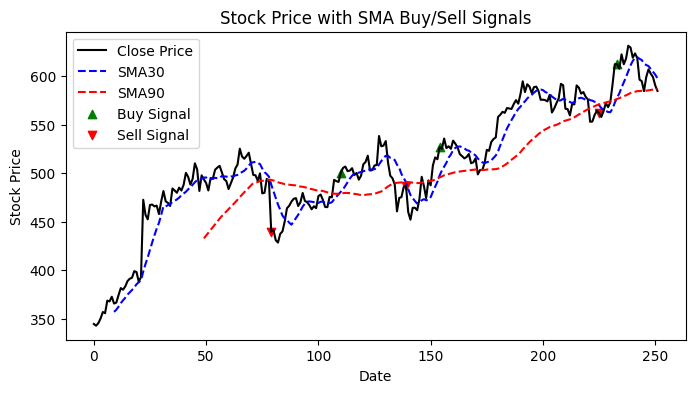

In [7]:
#Plot
plt.figure(figsize=(8, 4))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["SMA30"], label="SMA30", color="blue", linestyle="dashed")
plt.plot(df["SMA90"], label="SMA90", color="red", linestyle="dashed")
# Plot Buy and Sell Signals
plt.scatter(df.index[df["Buy_Signal_SMA"]], df["Close"][df["Buy_Signal_SMA"]], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(df.index[df["Sell_Signal_SMA"]], df["Close"][df["Sell_Signal_SMA"]], marker="v", color="red", label="Sell Signal", alpha=1)
plt.title("Stock Price with SMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [8]:
#Exponential moving average

df["EMA30"] = df["Close"].ewm(span= 10, adjust=False, min_periods=30).mean()
df["EMA90"] = df["Close"].ewm(span=50, adjust=False, min_periods=90).mean()
df["Buy_Signal_EMA"] = (df["EMA30"] > df["EMA90"]) & (df["EMA30"].shift(1) <= df["EMA90"].shift(1))
df["Sell_Signal_EMA"] = (df["EMA30"] < df["EMA90"]) & (df["EMA30"].shift(1) >= df["EMA90"].shift(1))

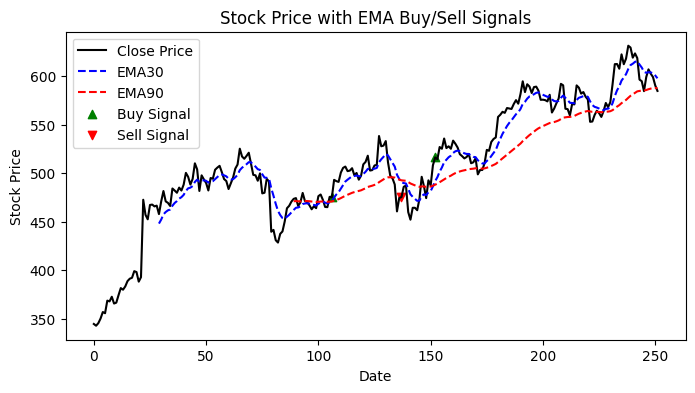

In [9]:

#Plot
plt.figure(figsize=(8, 4))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["EMA30"], label="EMA30", color="blue", linestyle="dashed")
plt.plot(df["EMA90"], label="EMA90", color="red", linestyle="dashed")
# Plot Buy and Sell Signals
plt.scatter(df.index[df["Buy_Signal_EMA"]], df["Close"][df["Buy_Signal_EMA"]], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(df.index[df["Sell_Signal_EMA"]], df["Close"][df["Sell_Signal_EMA"]], marker="v", color="red", label="Sell Signal", alpha=1)
plt.title("Stock Price with EMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


# 6. Forecasting

In [11]:
!pip install prophet optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.8 MB/s eta 0:00:00


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Prophet
from prophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

##


In [14]:
df.tail()

,Date,Close,High,Low,Open,Volume,SMA30,SMA90,Buy_Signal_SMA,Sell_Signal_SMA,EMA30,EMA90,Buy_Signal_EMA,Sell_Signal_EMA
247,2024-12-24,607.209778,607.449555,598.747336,602.184220,4726100,610.615924,585.597064,False,False,604.335796,586.761472,False,False
248,2024-12-26,602.813660,605.761050,598.407607,604.941771,6081400,607.736475,585.947802,False,False,604.059044,587.390969,False,False
249,2024-12-27,599.276855,601.315020,589.275743,598.877187,8084200,604.692023,586.417083,False,False,603.189555,587.857083,False,False
250,2024-12-30,590.714417,596.409362,585.059475,588.226640,7025900,601.833557,586.712319,False,False,600.921348,587.969135,False,False
251,2024-12-31,584.989563,593.442004,583.331004,591.743564,6019500,597.964001,586.902244,False,False,598.024660,587.852289,False,False


In [16]:
train_df = df[["Date","Close", 'Volume']]
train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

<ipython-input-16-9067046c37a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [23]:
train_df.tail()

,ds,y,Volume
247,2024-12-24,607.209778,4726100
248,2024-12-26,602.813660,6081400
249,2024-12-27,599.276855,8084200
250,2024-12-30,590.714417,7025900
251,2024-12-31,584.989563,6019500


In [24]:
actual = orginal[orginal['Date']>=datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])

In [25]:
test_df = actual[['Date', 'Close', 'Volume']]
test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

<ipython-input-25-abe0d53c666a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [27]:
len(train_df), len(test_df)

(252, 70)

In [30]:
from prophet.diagnostics import cross_validation, performance_metrics


def objective(trial):
    # Hyperparameters to tune
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.01, 10.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 10.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    # Add extra regressors
    model.add_regressor('Volume')
    # train_sub, valsub= train_test_split(train_df, test_size=0.2, random_state=42, shuffle=False)

    # Fit on the train_sub
    model.fit(train_df)

    df_cv = cross_validation(
        model=model,
        initial='180 days',   # e.g., use ~2 years of data before first cutoff
        horizon='30 days',    # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # Predict on val_sub
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]  # We'll optimize for RMSE

    return rmse_cv

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40)  # Increase n_trials for more thorough search


[I 2025-04-12 00:44:37,542] A new study created in memory with name: no-name-f6f44cf9-8663-43c6-b1a9-1d0c70bc8587
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/73alml1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/smncuiwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1420', 'data', 'file=/tmp/tmpjy_yydvd/73alml1t.json', 'init=/tmp/tmpjy_yydvd/smncuiwh.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modellwwco6ym/prophet_model-20250412004437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:37 - cmdstanpy - I

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vevjsvzg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x07xomkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14721', 'data', 'file=/tmp/tmpjy_yydvd/vevjsvzg.json', 'init=/tmp/tmpjy_yydvd/x07xomkw.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeligdpql87/prophet_model-20250412004437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/z0gdndby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/o80igbfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ld2_jjgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/a6_o9mis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53078', 'data', 'file=/tmp/tmpjy_yydvd/ld2_jjgf.json', 'init=/tmp/tmpjy_yydvd/a6_o9mis.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelt5fftl6m/prophet_model-20250412004438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4umdj0w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/18mznktn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9epljo5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/or80r62w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22610', 'data', 'file=/tmp/tmpjy_yydvd/9epljo5g.json', 'init=/tmp/tmpjy_yydvd/or80r62w.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelt57hb81z/prophet_model-20250412004439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9fzc4udd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_bfo7tgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zbm9ca29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mm_wm983.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33706', 'data', 'file=/tmp/tmpjy_yydvd/zbm9ca29.json', 'init=/tmp/tmpjy_yydvd/mm_wm983.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model5up16mdk/prophet_model-20250412004440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/h9nw9dgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0hj1ruu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/sro2icif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_hoyw05d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50877', 'data', 'file=/tmp/tmpjy_yydvd/sro2icif.json', 'init=/tmp/tmpjy_yydvd/_hoyw05d.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelasna_se_/prophet_model-20250412004440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ghv38uxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/18jsf0iy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5em0fc_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ra83aqbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52337', 'data', 'file=/tmp/tmpjy_yydvd/5em0fc_g.json', 'init=/tmp/tmpjy_yydvd/ra83aqbn.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelef2c_qn8/prophet_model-20250412004441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ecs7rskk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fcrjtqdu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ef05_9uw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/pr6vgurq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25362', 'data', 'file=/tmp/tmpjy_yydvd/ef05_9uw.json', 'init=/tmp/tmpjy_yydvd/pr6vgurq.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model1avir5g0/prophet_model-20250412004441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/l07z8_sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/writz2sa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m_tqr02p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/eqvj035h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27842', 'data', 'file=/tmp/tmpjy_yydvd/m_tqr02p.json', 'init=/tmp/tmpjy_yydvd/eqvj035h.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelae3n1nyz/prophet_model-20250412004442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/nrxarods.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_o2hdgbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hrg3jrvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/w9usfjw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74652', 'data', 'file=/tmp/tmpjy_yydvd/hrg3jrvn.json', 'init=/tmp/tmpjy_yydvd/w9usfjw1.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelpidgrtw1/prophet_model-20250412004443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/v7t2ar3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hzw5v7dl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5p4_wi0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/gk88u24_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80836', 'data', 'file=/tmp/tmpjy_yydvd/5p4_wi0w.json', 'init=/tmp/tmpjy_yydvd/gk88u24_.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelwaj6owwp/prophet_model-20250412004443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x9sbtaxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mt6zxw6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/otd22vmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/e9t9aukc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16164', 'data', 'file=/tmp/tmpjy_yydvd/otd22vmq.json', 'init=/tmp/tmpjy_yydvd/e9t9aukc.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model7133spzb/prophet_model-20250412004444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/n9hrpeg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/3kaw89ui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/17ygikae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/00fiodfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46789', 'data', 'file=/tmp/tmpjy_yydvd/17ygikae.json', 'init=/tmp/tmpjy_yydvd/00fiodfy.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelriw4m3kj/prophet_model-20250412004444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ebjgvnwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/bou35_pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/yl71jp14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mbdpx8ap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35825', 'data', 'file=/tmp/tmpjy_yydvd/yl71jp14.json', 'init=/tmp/tmpjy_yydvd/mbdpx8ap.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelu8lhutgv/prophet_model-20250412004445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/33_x03cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/akrqg3vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/nfimaao4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/aocz24gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99626', 'data', 'file=/tmp/tmpjy_yydvd/nfimaao4.json', 'init=/tmp/tmpjy_yydvd/aocz24gw.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelujwvblp_/prophet_model-20250412004446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/v9779_cb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/y7xav0kg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/rrrzy9v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/v1sd5pqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80187', 'data', 'file=/tmp/tmpjy_yydvd/rrrzy9v_.json', 'init=/tmp/tmpjy_yydvd/v1sd5pqc.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model0yeog5_a/prophet_model-20250412004446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9tqfaxzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2gmi8yoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/me5ovch9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/6op15cj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1488', 'data', 'file=/tmp/tmpjy_yydvd/me5ovch9.json', 'init=/tmp/tmpjy_yydvd/6op15cj_.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelvy28un_1/prophet_model-20250412004447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/abmz2kwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lh28_dse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9pnw62e4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mc4odjc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13590', 'data', 'file=/tmp/tmpjy_yydvd/9pnw62e4.json', 'init=/tmp/tmpjy_yydvd/mc4odjc2.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model1iix5wpr/prophet_model-20250412004448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/yriksxa3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/7e7o87c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/7rr_7y45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/96ssti10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92903', 'data', 'file=/tmp/tmpjy_yydvd/7rr_7y45.json', 'init=/tmp/tmpjy_yydvd/96ssti10.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model60j9seoa/prophet_model-20250412004449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/gyl16aa1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cvhplgll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/68ej0oof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4c21kwz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=322', 'data', 'file=/tmp/tmpjy_yydvd/68ej0oof.json', 'init=/tmp/tmpjy_yydvd/4c21kwz4.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeldp5rl99t/prophet_model-20250412004449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/z8are5i0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/bz1ri3z7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/km6siwjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/im7q8km4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45523', 'data', 'file=/tmp/tmpjy_yydvd/km6siwjq.json', 'init=/tmp/tmpjy_yydvd/im7q8km4.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeluixgzj7q/prophet_model-20250412004450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/f5lzg_0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5g228w89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/19wwp9pi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zpzpccyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57935', 'data', 'file=/tmp/tmpjy_yydvd/19wwp9pi.json', 'init=/tmp/tmpjy_yydvd/zpzpccyc.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelcfa6b36p/prophet_model-20250412004450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lw07afln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/a1zxtxwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ii0q_qij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/i4rreqvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72086', 'data', 'file=/tmp/tmpjy_yydvd/ii0q_qij.json', 'init=/tmp/tmpjy_yydvd/i4rreqvn.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelsy2orwsa/prophet_model-20250412004451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/6vnuh9zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/r49b35on.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ofs7tvb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b520s7iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33757', 'data', 'file=/tmp/tmpjy_yydvd/ofs7tvb9.json', 'init=/tmp/tmpjy_yydvd/b520s7iq.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model5y9kplfb/prophet_model-20250412004451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/r6mi40nh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2oyz5bix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/djc12_z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ndtuj3oc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17736', 'data', 'file=/tmp/tmpjy_yydvd/djc12_z9.json', 'init=/tmp/tmpjy_yydvd/ndtuj3oc.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelu5_8ia3g/prophet_model-20250412004452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m6hb9zmi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ufaj5owd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xrwloiux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9f9disl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80363', 'data', 'file=/tmp/tmpjy_yydvd/xrwloiux.json', 'init=/tmp/tmpjy_yydvd/9f9disl6.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelznu7c6zx/prophet_model-20250412004452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4dw9h4uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/pd0k0odu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2wh0na0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/g71jkp4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9727', 'data', 'file=/tmp/tmpjy_yydvd/2wh0na0o.json', 'init=/tmp/tmpjy_yydvd/g71jkp4u.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model21c6mxc0/prophet_model-20250412004453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/l4pvlv2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/jpwt4vvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0y1vfao0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hlv9qvm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1825', 'data', 'file=/tmp/tmpjy_yydvd/0y1vfao0.json', 'init=/tmp/tmpjy_yydvd/hlv9qvm1.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelpp8z4pzc/prophet_model-20250412004453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qvn19ddn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1fk9fir1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/rj82dtrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/7umhwnpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70487', 'data', 'file=/tmp/tmpjy_yydvd/rj82dtrj.json', 'init=/tmp/tmpjy_yydvd/7umhwnpd.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelw0ub9xt6/prophet_model-20250412004454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/dug1s78k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/l_9dr3s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/q21wlono.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/bxkft2ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86278', 'data', 'file=/tmp/tmpjy_yydvd/q21wlono.json', 'init=/tmp/tmpjy_yydvd/bxkft2ul.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelceexr9g1/prophet_model-20250412004455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hlqzn_wb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0b8jfxxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/iarflu05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/8jbfw367.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2676', 'data', 'file=/tmp/tmpjy_yydvd/iarflu05.json', 'init=/tmp/tmpjy_yydvd/8jbfw367.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeljgzs8cz_/prophet_model-20250412004456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xgkn_upc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/23ajxq6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cssip3qe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/sxzwukol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18104', 'data', 'file=/tmp/tmpjy_yydvd/cssip3qe.json', 'init=/tmp/tmpjy_yydvd/sxzwukol.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelht7aopej/prophet_model-20250412004457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/w4l3zsbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/l3_mwreu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/u6muayhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/aqyfoqwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18315', 'data', 'file=/tmp/tmpjy_yydvd/u6muayhg.json', 'init=/tmp/tmpjy_yydvd/aqyfoqwi.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model6t1drsxw/prophet_model-20250412004457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9difu9xk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/25mjlhoa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ir86kt_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x58m0k9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16001', 'data', 'file=/tmp/tmpjy_yydvd/ir86kt_b.json', 'init=/tmp/tmpjy_yydvd/x58m0k9a.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model0bbw2rma/prophet_model-20250412004458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b5hyzx1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/bsdxangr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mzb_cie_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vblvln0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75857', 'data', 'file=/tmp/tmpjy_yydvd/mzb_cie_.json', 'init=/tmp/tmpjy_yydvd/vblvln0l.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeln0t54l6v/prophet_model-20250412004459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/gxoqetu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/p4edla16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qjjw3hrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/7u2cyizl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90741', 'data', 'file=/tmp/tmpjy_yydvd/qjjw3hrt.json', 'init=/tmp/tmpjy_yydvd/7u2cyizl.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelp4x9ezvx/prophet_model-20250412004459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/3s4k9fmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xxuyhtie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/yw6v8j6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_qrjerxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52160', 'data', 'file=/tmp/tmpjy_yydvd/yw6v8j6i.json', 'init=/tmp/tmpjy_yydvd/_qrjerxs.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model6wrbw72j/prophet_model-20250412004500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/k1vbf65w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lak8iix7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/re3nwg56.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fbilpjxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26769', 'data', 'file=/tmp/tmpjy_yydvd/re3nwg56.json', 'init=/tmp/tmpjy_yydvd/fbilpjxm.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model0a93uloi/prophet_model-20250412004501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1yau93le.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kus8smhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/onvzksn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/sjqf375j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4154', 'data', 'file=/tmp/tmpjy_yydvd/onvzksn7.json', 'init=/tmp/tmpjy_yydvd/sjqf375j.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model81gejlrw/prophet_model-20250412004502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fb3y5cbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ous6irqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/apd49ldq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hxaxicw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33532', 'data', 'file=/tmp/tmpjy_yydvd/apd49ldq.json', 'init=/tmp/tmpjy_yydvd/hxaxicw4.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelnmrlm68f/prophet_model-20250412004503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2xgnn562.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mp07yw13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/o1hdz85m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/p32gk2tu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66384', 'data', 'file=/tmp/tmpjy_yydvd/o1hdz85m.json', 'init=/tmp/tmpjy_yydvd/p32gk2tu.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelxdq83mji/prophet_model-20250412004504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/k9x03xug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1yzj0jfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [31]:
best_trial = study.best_trial
print("Best trial RMSE (Val):", best_trial.value)
print("Best trial params:", best_trial.params)

Best trial RMSE (Val): 24.985165349803697
Best trial params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05082847712557425, 'seasonality_prior_scale': 7.002378430855669, 'holidays_prior_scale': 2.1256843433670154}


In [33]:
best_params = study.best_params

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)
final_model.add_regressor('Volume')
final_model.fit(train_df)

df_cv_final = cross_validation(
    model=final_model,
    initial='180 days',
    horizon='30 days',
    period='90 days'
)
df_metrics_final = performance_metrics(df_cv_final, rolling_window=1)

print("\n=== Final Model cross_validation Metrics ===")
print(df_metrics_final[['mse','rmse','mae','mape']].head())




future_test = test_df[['ds','Volume']]
forecast_test = final_model.predict(future_test)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/y7_nltv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m8h1gruk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49523', 'data', 'file=/tmp/tmpjy_yydvd/y7_nltv3.json', 'init=/tmp/tmpjy_yydvd/m8h1gruk.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelyv1_bs3f/prophet_model-20250412004607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cut

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cww_bxkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/avp6zc3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98024', 'data', 'file=/tmp/tmpjy_yydvd/cww_bxkj.json', 'init=/tmp/tmpjy_yydvd/avp6zc3y.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelbui6_41k/prophet_model-20250412004607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ckeswy28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cp65sfui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


=== Final Model cross_validation Metrics ===
          mse       rmse       mae     mape
0  624.258488  24.985165  20.45598  0.03551


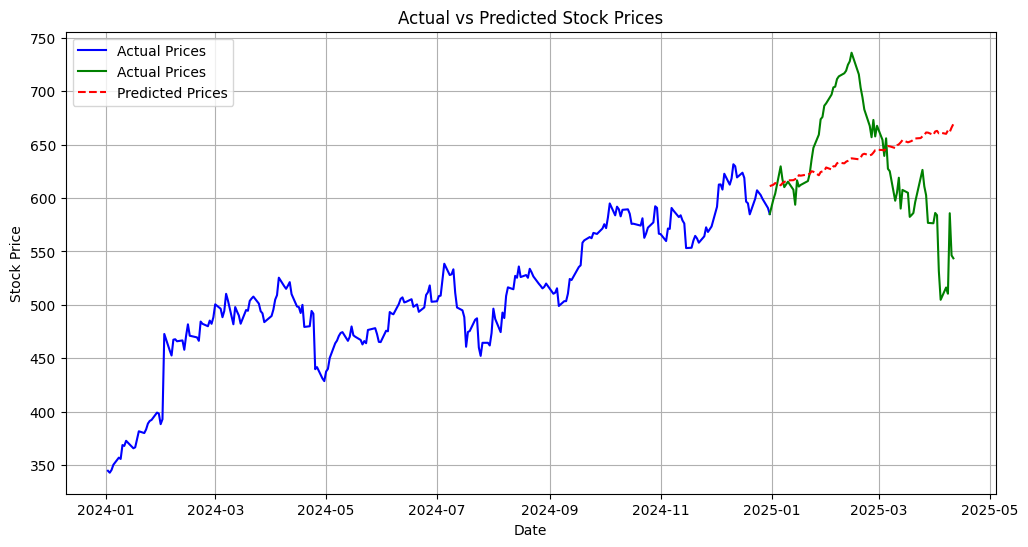

In [37]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df['Date'], df['Close'], label="Actual Prices", color='blue')
plt.plot(actual['Date'], actual['Close'], label="Actual Prices", color='green')
plt.plot(actual['Date'], forecast_test['yhat'], label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

Into to lagged features

In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import optuna
from prophet.diagnostics import cross_validation, performance_metrics
import datetime
import numpy as np

# Assuming you have train_df and test_df loaded as in your original notebook
# Make sure 'ds' column is in datetime format

# --- Define your objective function for Optuna (if you haven't run it already) ---
def objective(trial):
    # Hyperparameters to tune
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.01, 20.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 20.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    # Add extra regressors
    model.add_regressor('Volume')

    # Fit on the train_df
    model.fit(train_df)

    df_cv = cross_validation(
        model=model,
        initial='180 days',   # e.g., use ~2 years of data before first cutoff
        horizon='30 days',     # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # Predict on val_sub
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]   # We'll optimize for RMSE

    return rmse_cv

# --- Run Optuna study (if you haven't already) ---
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40)  # Increase n_trials for more thorough search
best_trial = study.best_trial
print("Best trial RMSE (Val):", best_trial.value)
print("Best trial params:", best_trial.params)

best_params = study.best_params

# --- Modify Prophet to only predict on business days ---

def business_day_filter(dates):
    """Filters out non-business days (weekends) from a list of dates."""
    return [date for date in dates if date.weekday() < 5]

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

lags_to_include = [1, 5, 10, 20] # Example lags
train_df_lagged = create_lagged_features(train_df.copy(), lags_to_include)
test_df_lagged = create_lagged_features(test_df.copy(), lags_to_include)

# Add the lagged features as regressors to the Prophet model
for lag in lags_to_include:
    final_model.add_regressor(f'Close_Lag{lag}')
final_model.add_regressor('Volume') # Ensure 'Volume' is added

final_model.fit(train_df_lagged)

# Create future dataframe with all dates in the test period
future_all = final_model.make_future_dataframe(periods=len(test_df), freq='D')

# Filter for business days
future_business_days = future_all[future_all['ds'].dt.weekday < 5]

# Merge with the 'Volume' data for the test period
future_test_with_volume = pd.merge(future_business_days, test_df[['ds', 'Volume']], on='ds', how='inner')

# Ensure the order of columns matches what the model was trained on
future_test_lagged = future_test_with_volume[['ds', 'Volume']].copy()
for lag in lags_to_include:
    future_test_lagged[f'Close_Lag{lag}'] = np.nan # Initialize with NaN

# Manually create lagged features for the future (this is a bit tricky as we don't have actual future 'y' values)
# A more accurate approach might involve iteratively predicting and using the predicted values for subsequent lags,
# but for a direct prediction on the test set, we'll use the lagged values from the end of the training data.

last_train_data = train_df_lagged.tail(lags_to_include[-1])
last_train_data_y = last_train_data[['y']].values[::-1]
num_rows_to_fill = len(last_train_data_y)
lag_columns = [f'Close_Lag{lag}' for lag in lags_to_include]

for i in range(num_rows_to_fill):
    for j, lag in enumerate(lags_to_include):
        if i < len(future_test_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag}'] = last_train_data_y[i, 0]

for i in range(lags_to_include[-1], len(future_test_lagged)):
    for lag_val in lags_to_include:
        if i - lag_val >= 0 and i - lag_val < len(test_df_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = test_df_lagged.iloc[i - lag_val]['y']
        else:
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = np.nan # Handle cases where lag exceeds available data
future_test_lagged.dropna(inplace=True)



[I 2025-04-12 01:26:27,963] A new study created in memory with name: no-name-cc0dd9f9-73c0-4635-b75d-46afa5cc5467
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2n5rx5jv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9ua7pnvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17550', 'data', 'file=/tmp/tmpjy_yydvd/2n5rx5jv.json', 'init=/tmp/tmpjy_yydvd/9ua7pnvy.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelkl6sas57/prophet_model-20250412012628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:28 - cmdstanpy - 

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/z0ddtk9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xwkb4a0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70361', 'data', 'file=/tmp/tmpjy_yydvd/z0ddtk9e.json', 'init=/tmp/tmpjy_yydvd/xwkb4a0f.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelmmowgvjt/prophet_model-20250412012628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/29m48gcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/iof37iby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m9t4u6vb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0ivp5cvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98539', 'data', 'file=/tmp/tmpjy_yydvd/m9t4u6vb.json', 'init=/tmp/tmpjy_yydvd/0ivp5cvv.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelo3gc5cz6/prophet_model-20250412012628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qf1ot5ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qjqxbth2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ieyorvqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/i4w8rpkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58012', 'data', 'file=/tmp/tmpjy_yydvd/ieyorvqn.json', 'init=/tmp/tmpjy_yydvd/i4w8rpkq.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelgjc3o7vg/prophet_model-20250412012629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0desjrj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/c627wu8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/8ifx6a5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2yzzw_po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5134', 'data', 'file=/tmp/tmpjy_yydvd/8ifx6a5l.json', 'init=/tmp/tmpjy_yydvd/2yzzw_po.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelz3kn6uq0/prophet_model-20250412012629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/14n5tyu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qpvl04jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ny62pp72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ql46t3_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35517', 'data', 'file=/tmp/tmpjy_yydvd/ny62pp72.json', 'init=/tmp/tmpjy_yydvd/ql46t3_a.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelbg4cj2qp/prophet_model-20250412012630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lph_6x67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mbhpx8ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kewbavtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/yplvnv6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61444', 'data', 'file=/tmp/tmpjy_yydvd/kewbavtl.json', 'init=/tmp/tmpjy_yydvd/yplvnv6n.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelp_gievs6/prophet_model-20250412012631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1r3cf_rd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/spw0242e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0yfjgz6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_073u2qi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38465', 'data', 'file=/tmp/tmpjy_yydvd/0yfjgz6g.json', 'init=/tmp/tmpjy_yydvd/_073u2qi.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeluq2w4jt0/prophet_model-20250412012631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lrj_nahf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/efi2_jwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/8ns_roq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/7ybf9ca1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59061', 'data', 'file=/tmp/tmpjy_yydvd/8ns_roq1.json', 'init=/tmp/tmpjy_yydvd/7ybf9ca1.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeljkt13yql/prophet_model-20250412012632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_o06a2wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x799l027.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/va9wfzun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vp9qeoqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5960', 'data', 'file=/tmp/tmpjy_yydvd/va9wfzun.json', 'init=/tmp/tmpjy_yydvd/vp9qeoqo.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model29jl41fz/prophet_model-20250412012632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/g_jtshxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4xf_2js7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/z_7y_8rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4eymdax1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5691', 'data', 'file=/tmp/tmpjy_yydvd/z_7y_8rm.json', 'init=/tmp/tmpjy_yydvd/4eymdax1.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelfxxm6pp4/prophet_model-20250412012633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fl0nz83d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_6voku4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9bbu_a99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/3ygtlbqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3399', 'data', 'file=/tmp/tmpjy_yydvd/9bbu_a99.json', 'init=/tmp/tmpjy_yydvd/3ygtlbqk.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modele5djovrd/prophet_model-20250412012634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xu_kfm7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/48dyacf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9qccop8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kbjrc36q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22226', 'data', 'file=/tmp/tmpjy_yydvd/9qccop8d.json', 'init=/tmp/tmpjy_yydvd/kbjrc36q.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model8bmt8fj2/prophet_model-20250412012634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/enqfcetw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xa7g697n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lhia0x9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/uydnq6or.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32525', 'data', 'file=/tmp/tmpjy_yydvd/lhia0x9c.json', 'init=/tmp/tmpjy_yydvd/uydnq6or.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeld30yp8o2/prophet_model-20250412012635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vmish3dg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1c0qabu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ps1mutdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qifreg61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10829', 'data', 'file=/tmp/tmpjy_yydvd/ps1mutdf.json', 'init=/tmp/tmpjy_yydvd/qifreg61.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model8rpb8vs8/prophet_model-20250412012635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b1h_zxon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/e_6b3p42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/exw479uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1utxru3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32379', 'data', 'file=/tmp/tmpjy_yydvd/exw479uv.json', 'init=/tmp/tmpjy_yydvd/1utxru3l.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelzuogjicl/prophet_model-20250412012636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/q6hfadct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/nk2io78k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xx6vldnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zlseq7cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67497', 'data', 'file=/tmp/tmpjy_yydvd/xx6vldnw.json', 'init=/tmp/tmpjy_yydvd/zlseq7cr.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeli9jksk7a/prophet_model-20250412012637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/e727exbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/agwtr915.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/u6oy2k2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0j4n80c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56685', 'data', 'file=/tmp/tmpjy_yydvd/u6oy2k2f.json', 'init=/tmp/tmpjy_yydvd/0j4n80c6.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelgjjyr_5i/prophet_model-20250412012638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/1qtax4b5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/whw9b551.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/04252zas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/udvvle3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2670', 'data', 'file=/tmp/tmpjy_yydvd/04252zas.json', 'init=/tmp/tmpjy_yydvd/udvvle3q.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelekgayb9b/prophet_model-20250412012638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0vgdv9d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fcryncss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2e2a54xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kmvhp3kh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63001', 'data', 'file=/tmp/tmpjy_yydvd/2e2a54xo.json', 'init=/tmp/tmpjy_yydvd/kmvhp3kh.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelfyo8en47/prophet_model-20250412012639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/a7undcc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/d5uouii9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/q1add90c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/6qw2a3or.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55115', 'data', 'file=/tmp/tmpjy_yydvd/q1add90c.json', 'init=/tmp/tmpjy_yydvd/6qw2a3or.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelrknr_dxt/prophet_model-20250412012639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b8w0jjzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ecv1gxct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/r5b_2yzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/aqijwbd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31180', 'data', 'file=/tmp/tmpjy_yydvd/r5b_2yzt.json', 'init=/tmp/tmpjy_yydvd/aqijwbd2.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model352un_xq/prophet_model-20250412012640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/k9mgl5zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zcktfq65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4cqfzvw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x66aauk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47699', 'data', 'file=/tmp/tmpjy_yydvd/4cqfzvw7.json', 'init=/tmp/tmpjy_yydvd/x66aauk8.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model2ir4ra5n/prophet_model-20250412012640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/g3i7_gyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mzriss_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ajy_0f85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/9aq3nhz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58948', 'data', 'file=/tmp/tmpjy_yydvd/ajy_0f85.json', 'init=/tmp/tmpjy_yydvd/9aq3nhz_.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelrsrmdwpz/prophet_model-20250412012641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/klulmxaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/acsqkz8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kaw5ghos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m43nw5sh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45177', 'data', 'file=/tmp/tmpjy_yydvd/kaw5ghos.json', 'init=/tmp/tmpjy_yydvd/m43nw5sh.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model7rspqmh5/prophet_model-20250412012641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fqwsefp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zs5sbd7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/nzdky834.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/e2l9kwcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67496', 'data', 'file=/tmp/tmpjy_yydvd/nzdky834.json', 'init=/tmp/tmpjy_yydvd/e2l9kwcv.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeln3u7h0as/prophet_model-20250412012642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/dl2u5l_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/6ve09lw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/hlzx_wzv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/y6v_lxen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71306', 'data', 'file=/tmp/tmpjy_yydvd/hlzx_wzv.json', 'init=/tmp/tmpjy_yydvd/y6v_lxen.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelrwkad159/prophet_model-20250412012642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mkurswp6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/0bnnhxb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/bfcob9ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/d1m9140m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96631', 'data', 'file=/tmp/tmpjy_yydvd/bfcob9ay.json', 'init=/tmp/tmpjy_yydvd/d1m9140m.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelqqlxh4p4/prophet_model-20250412012643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zw5giqup.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cvexat3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4ikm3ic2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/kb_2yf3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16806', 'data', 'file=/tmp/tmpjy_yydvd/4ikm3ic2.json', 'init=/tmp/tmpjy_yydvd/kb_2yf3y.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model5m314534/prophet_model-20250412012644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ajnjabtu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/x9xpryhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/cs5l3kdc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/3eolxyuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73598', 'data', 'file=/tmp/tmpjy_yydvd/cs5l3kdc.json', 'init=/tmp/tmpjy_yydvd/3eolxyuu.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelgmsojh97/prophet_model-20250412012644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/os3qowf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4sak3n2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/t0rhoyt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ov53r957.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98821', 'data', 'file=/tmp/tmpjy_yydvd/t0rhoyt4.json', 'init=/tmp/tmpjy_yydvd/ov53r957.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelvmckkfp2/prophet_model-20250412012645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/dmh26svs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/3emypura.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/r70s5ru9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vzr_2z4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36299', 'data', 'file=/tmp/tmpjy_yydvd/r70s5ru9.json', 'init=/tmp/tmpjy_yydvd/vzr_2z4w.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelh_je2hek/prophet_model-20250412012645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ufwq7sf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/4xeep7qs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b2xf9ek6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/xjerzyfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18629', 'data', 'file=/tmp/tmpjy_yydvd/b2xf9ek6.json', 'init=/tmp/tmpjy_yydvd/xjerzyfc.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model_f87f6t6/prophet_model-20250412012646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/8pd1qz_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/jfp_48sa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/lsguq3v9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5_roecqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48349', 'data', 'file=/tmp/tmpjy_yydvd/lsguq3v9.json', 'init=/tmp/tmpjy_yydvd/5_roecqn.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelskugbeqi/prophet_model-20250412012646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5lo2ojxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/v1cierm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/b_mhh07s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/m3nn9z4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38340', 'data', 'file=/tmp/tmpjy_yydvd/b_mhh07s.json', 'init=/tmp/tmpjy_yydvd/m3nn9z4n.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelt1ka0c1k/prophet_model-20250412012647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/wo1ulrlk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5qpjicwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/5vci58yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2l_j7089.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6763', 'data', 'file=/tmp/tmpjy_yydvd/5vci58yz.json', 'init=/tmp/tmpjy_yydvd/2l_j7089.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model4cv38_2u/prophet_model-20250412012647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/z8hlc_cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/t8dc2nc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/vzt4nxlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/2a665_ut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64931', 'data', 'file=/tmp/tmpjy_yydvd/vzt4nxlu.json', 'init=/tmp/tmpjy_yydvd/2a665_ut.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model6wd6hzhb/prophet_model-20250412012648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/tv099x_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/fqnv7xbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/tj0hilbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mxibg0gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94303', 'data', 'file=/tmp/tmpjy_yydvd/tj0hilbt.json', 'init=/tmp/tmpjy_yydvd/mxibg0gl.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modeliviw1edu/prophet_model-20250412012648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/70h6o50x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/eghbfa7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/80xfj_e6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/zfmcj6un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49296', 'data', 'file=/tmp/tmpjy_yydvd/80xfj_e6.json', 'init=/tmp/tmpjy_yydvd/zfmcj6un.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model_o52qkqk/prophet_model-20250412012649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/twvot6g7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/jqkmr97d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/ihr40t_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/miwypdj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75319', 'data', 'file=/tmp/tmpjy_yydvd/ihr40t_t.json', 'init=/tmp/tmpjy_yydvd/miwypdj1.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_model3b0_yku0/prophet_model-20250412012650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/th_sv1al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/8_yl4u6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/_tq06d48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/qdkklw64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33156', 'data', 'file=/tmp/tmpjy_yydvd/_tq06d48.json', 'init=/tmp/tmpjy_yydvd/qdkklw64.json', 'output', 'file=/tmp/tmpjy_yydvd/prophet_modelz9e1oc03/prophet_model-20250412012651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/54txl81q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy_yydvd/mkjmya8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best trial RMSE (Val): 25.12953293988657
Best trial params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.050254237029364345, 'seasonality_prior_scale': 0.038956819992160864, 'holidays_prior_scale': 3.0797637101884656}


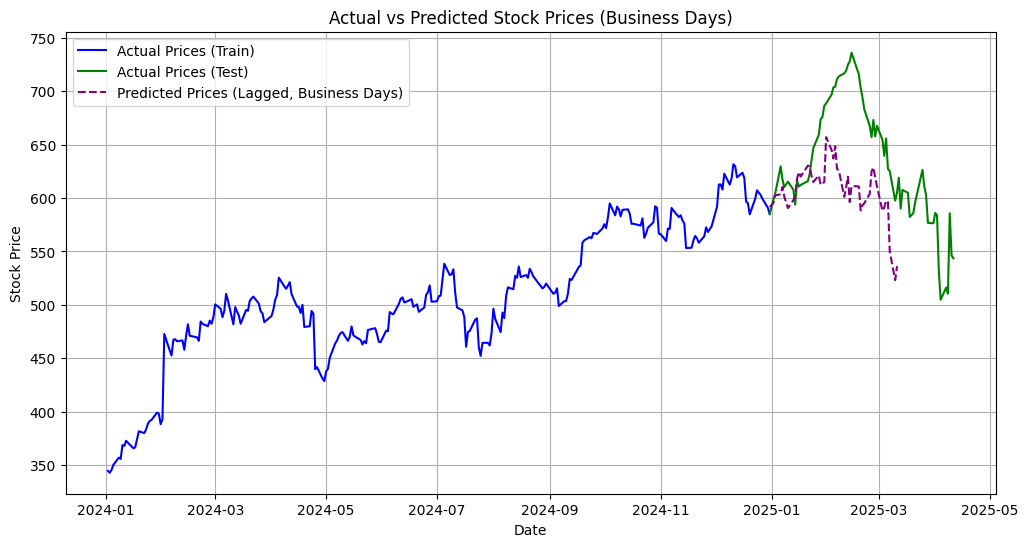

In [46]:

forecast_test_lagged = final_model.predict(future_test_lagged)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df['Date'], df['Close'], label="Actual Prices (Train)", color='blue')
plt.plot(actual['Date'], actual['Close'], label="Actual Prices (Test)", color='green')
plt.plot(future_test_lagged['ds'], forecast_test_lagged['yhat'], label="Predicted Prices (Lagged, Business Days)", color='purple', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices (Business Days)")
plt.legend()
plt.show()